# Control Systems : Assignment 2

# Import numpy as np

In [1]:
from __future__ import division
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# The external force function , can be modellled as per your requirement

In [2]:
def f1(t):
    if t>0:
        return(1)

# PID control implemented below

In [3]:
global ie,e_dot
ie=0.0
e_dot=0
import random as rn
def F(y,t):
    global ie
    global e_dot
    ie_new =0
    h=0.1 #dt used for time between 2 iterations
    sigma=0.05 # dirty derivative gain
    beta=(2*sigma-h)/(2*sigma+h)
    m = 5.31*(rn.random()*(0.4)+0.8) # error in measurements of m, b and k .
    k = 2.2*(rn.random()*(0.4)+0.8)
    b = 0.545*(rn.random()*(0.4)+0.8)
    kd=15.314
    kp=14.551
    ki=40.3
    pos=y[1]
    # force limit
    force_limit=6 
    #feedback linearized force
    force_fb=1
    # equlibrium force around pos=0
    x_equi=0
    error=(x_ref(t)-pos)
    if t>0.1:
        ie_new=ie+error*h*0.5
    e_dot=(1-beta)*(ie_new-ie)/h+e_dot*beta
    force_e=kp*error-kd*e_dot+ie*ki
    #total force 
    force=force_e+force_fb
    ie=ie_new
    #saturate force 
    if abs(force)>force_limit:
        force=force_limit*np.sign(force)
        # integrator anti-windup
        ie=ie+(force_limit-force)/ki
    return(np.array([force,0]))

# Reference motion of mass

In [1]:
def x_ref(t):
    if (t%200 <= 99):
        return(1)
    else:
        return(-1)

# Solving for X''

In [2]:
def f(y,t):
    # physical constants of the system
    m = 5.31
    k = 2.2
    b =0.545
    A=np.array([[m,0],[0,1]],dtype=np.float64)
    B=np.array([[b,k],[-1,0]],dtype=np.float64)
    return(np.dot(inv(A),F(y,t)-np.dot(B,y)))

# Function for rk4 implementation

In [3]:
def rk4(y,t,dt):
    k1=f(y,t)
    k2=f(y*k1*0.5*dt,t+dt*0.5)
    k3=f(y*k2*0.5*dt,t+dt*0.5)
    k4=f(y+k3*dt,t+dt)
    return(dt * (k1 + 2*k2 + 2*k3 + k4) /6)

# Function to call state

In [4]:
def call_state():   
    # initializations matrices
    v_data=[]
    p_data=[]
    y=np.array([0,0])
    h=0.1  # dt used during simulation
    time=np.arange(0,1000,h,dtype=np.float64)
    state=[]
    p_last=0
    for i in range(len(time)):
        y=y+rk4(y,time[i],h)
        state.append(y)
        v_data.append(y[0])
        p_data.append(y[1])
        p_last=p_data[i]
    return(p_data,v_data)

#  Function for Animation

In [5]:
# initialization of plot , line and point objects
fig = plt.figure() 
ax = plt.axes(xlim=(-3, 3), ylim=(-1, 1)) 
point, = ax.plot(0, 0,marker="o",color="green",markersize=15) 
line, = ax.plot([],[],lw=2)
wall, = ax.plot([],[],lw=2)
def init():
    line.set_data([], []) 
    point.set_data([],[])
    wall.set_data([], []) 
    return point, line,wall
# update the animation with each frame
def animate(frame):
    p,v=call_state()
    point.set_data([p[frame]],[0])
    line.set_data(np.linspace(-3,p[frame],100),np.zeros(100))
    wall.set_data(-3*np.ones(100),np.linspace(-0.5,0.5,100))
    return point,line,wall

NameError: name 'plt' is not defined

In [12]:
from matplotlib.animation import FuncAnimation
anim = FuncAnimation(fig, animate,init_func=init,frames=500, interval=20, blit=False)

In [13]:
from IPython import display
video=anim.to_html5_video()
html=display.HTML(video)
display.display(html)
plt.close()

# Simulated vs reference behaviour for reference function A sin(wt)

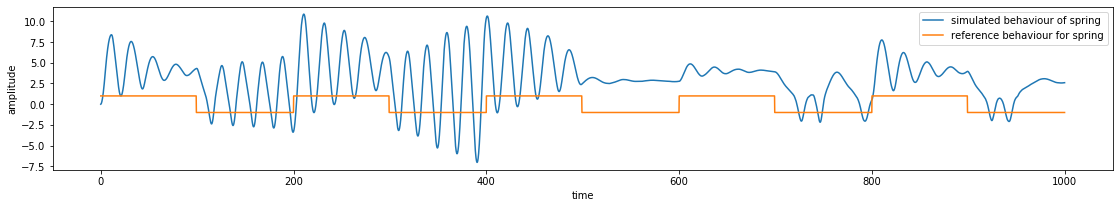

In [11]:
p,v=call_state()
x=np.arange(0,1000,0.1)
y=[x_ref(i) for i in x ]
plt.figure(figsize=(19,3))
plt.plot(x,p,label="simulated behaviour of spring")
plt.plot(x,y,label="reference behaviour for spring")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()
plt.show()